# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [60]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [63]:
original_cities = ["Paris", "London", "New York City"]
original_cities

['Paris', 'London', 'New York City']

In [57]:
time.sleep(1)

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in original_cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
    max_temp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(response['dt'])
    #print(json.dumps(response, indent=2))
    
print(f"The latitude information received is: {lat}")
print(f"The latitude information received is: {lng}")
print(f"The temperature information received is: {max_temp}")
print(f"The latitude information received is: {humidity}")
print(f"The latitude information received is: {cloudiness}")
print(f"The latitude information received is: {wind_speed}")
print(f"The latitude information received is: {country}")
print(f"The latitude information received is: {date}")

The latitude information received is: [48.85, 51.51, 40.71]
The latitude information received is: [2.35, -0.13, -74.01]
The temperature information received is: [9, 12, 17]
The latitude information received is: [87, 66, 59]
The latitude information received is: [96, 100, 75]
The latitude information received is: [1.12, 1, 6.2]
The latitude information received is: ['FR', 'GB', 'US']
The latitude information received is: [1603056979, 1603056997, 1603057078]


## Convert Raw Data to DataFrame
* Save as csv

In [65]:
#create a df of the variables
weather_dict = {
   "City": original_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Contry": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Contry,Date
0,Paris,48.85,2.35,9,87,96,1.12,FR,1603056979
1,London,51.51,-0.13,12,66,100,1.00,GB,1603056997
2,New York City,40.71,-74.01,17,59,75,6.20,US,1603057078


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

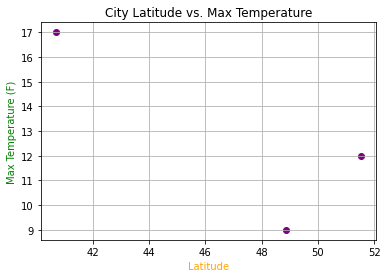

In [69]:
#lat vs temp scatter plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.show()

### Latitude vs. Humidity Plot

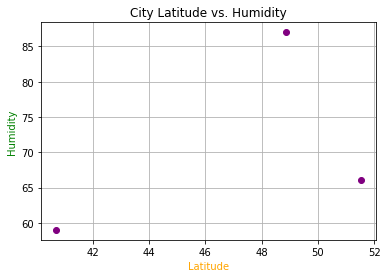

In [70]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Humidity", color = "green")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.show()

### Latitude vs. Cloudiness Plot

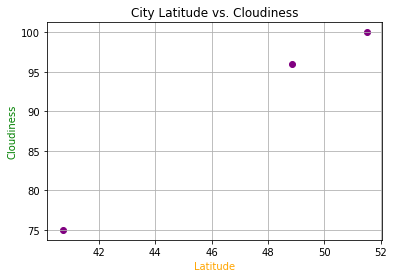

In [72]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Cloudiness", color = "green")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.show()

### Latitude vs. Wind Speed Plot

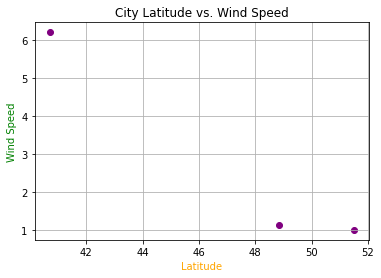

In [73]:
#lat vs humidity scatter plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], color = "purple")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Wind Speed", color = "green")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [80]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data['Lat'], weather_data['Max Temp'])

# Get regression values
regress_values = weather_data['Max Temp'] * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.59x +40.18


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.663464666193594


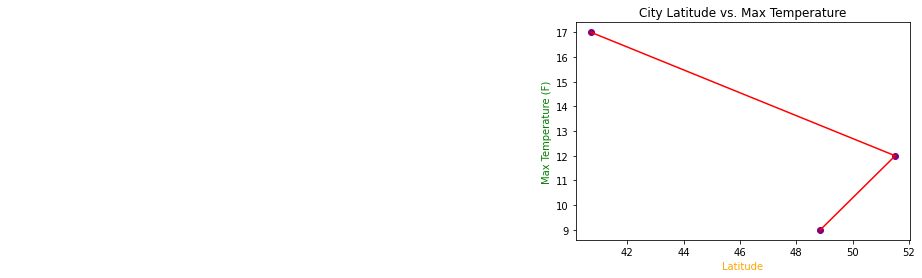

In [83]:
# Create Plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], color = "purple")
plt.plot(weather_data['Lat'], weather_data['Max Temp'],"r-")
plt.xlabel("Latitude", color = "orange")
plt.ylabel("Max Temperature (F)", color = "green")
plt.title("City Latitude vs. Max Temperature")
# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression